# Initialize

In [1]:
%cd ".."
# %cd /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/GenerativeModelsMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [3]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/100D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-07-29 14:52:01.816637: Importing os...
2024-07-29 14:52:01.816811: Importing sys...
Visible devices: [3]
2024-07-29 14:52:01.817055: Importing timer from timeit...
2024-07-29 14:52:01.817123: Setting env variables for tf import (only device(s) [3] will be available)...
2024-07-29 14:52:01.817251: Importing numpy...
2024-07-29 14:52:02.008969: Importing matplotlib...
2024-07-29 14:52:02.406162: Importing h5py...
2024-07-29 14:52:02.471555: Importing importlib.util...
2024-07-29 14:52:02.471663: Importing json...
2024-07-29 14:52:02.471726: Importing pandas...
2024-07-29 14:52:03.109689: Importing random...
2024-07-29 14:52:03.109846: Importing scipy utils...
2024-07-29 14:52:03.732202: Importing subprocess...
2024-07-29 14:52:03.732340: Importing tensorflow...
Tensorflow version: 2.16.1
2024-07-29 14:52:07.787478: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-07-29 14:52:09.138859: Importing timeit...
2024-07-29 14:52:09.138962: Importing tqdm...
2

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-07-29 14:52:15.747604: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #3, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-07-29 14:52:15.778142: All done.


# Model definition

In [3]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
dist_1 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
dist_2 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)
sample from dist_1:  tf.Tensor(
[[  1.91445107  -2.76153434  -3.43323223   7.64576955   0.40180012
   -1.54630583   5.40504032  -2.45371653  -6.6117742    0.10771743
   -2.4273847    7.60628533   5.01479685  -0.80459746  -0.86720562
   -3.75163826  -0.69391021  -5.33313732   5.26738688  -5.78498904
    1.12458017  -4.47940648  -0.4474242   -2.59568939  -2.44898263
    1.55035606  -1.85271676  -5.47760979  -5.4891624    1.92841313
    1.80298843   1.37451324  -5.50705267  -4.87041055  -0.72087521
   -5.10871132   4.48338344 -10.6507996   -2.19847207   6.38164433
   -1.68827092   1.54153519   5.89025258   2.0636

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 100_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [7]:
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100, # to be included in metric kwargs
                           seed_slicing = 0, # to be included in metric kwargs
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
FGDMetric = GMetrics.FGDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               num_batches = 20, # to be included in metric kwargs
                               num_points = 10, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
MMDMetric = GMetrics.MMDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4, # to be included in metric kwargs
                               block_size = 20_000, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,100000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,1000000000,False,10


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetric",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20, # optimized for 5D
                                       "latex": "$t_{\mathrm{FGD}}$",
                                       "null_file": null_hypotheses_dir+"FGD.json"},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetric" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 20_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$t_{\mathrm{MMD}}$",
                                       "null_file": null_hypotheses_dir+"MMD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$t_{\overline{\mathrm{KS}}}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mathrm{SKS}}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mathrm{SW}}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mathrm{LLR}}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fgd': {'name': 'fgd',
  'object_name': 'FGDMetric',
  'class_name': 'GMetrics.FGDMetric',
  'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: 1',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 20,
  'latex': '$t_{\\mathrm{FGD}}$',
  'null_file': 'results/100D_unimodal/100D_100K/null_hypothesis/FGD.json'},
 'mmd': {'name': 'mmd',
  'object_name': 'MMDMetric',
  'class_name': 'GMet

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/100D_unimodal/100D_100K/null_hypothesis/FGD.json
Loading mmd from results/100D_unimodal/100D_100K/null_hypothesis/MMD.json
Loading ks from results/100D_unimodal/100D_100K/null_hypothesis/KS.json


Loading sks from results/100D_unimodal/100D_100K/null_hypothesis/SKS.json
Loading swd from results/100D_unimodal/100D_100K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [6800, 3199], 0.00466890665832056], [0.95, [9500, 500], 0.02191486315716365], [0.99, [9900, 100], 0.03391472759791333]]
Computing time for metric fgd: 51866.854615483084
ThresholdS for metric mmd: [[0.68, [6800, 3199], 0.18560537190887771], [0.95, [9500, 500], 1.0112527756913323], [0.99, [9900, 100], 1.649274847672359]]
Computing time for metric mmd: 18801.69126591808
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.8967765315487999], [0.95, [9500, 500], 0.9967509872322343], [0.99, [9900, 100], 1.0625355563878416]]
Computing time for metric ks: 1499.1960004840512
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.8947858400838061], [0.95, [9500, 500], 0.9973319174306536], [0.99, [9900, 100], 1.063900298156752]]
Computing time for metric sks: 1603.7995560748968
ThresholdS for metric swd: [[0.68, [6800, 3199], 0.38191676389110646], [0.95, [9500, 500], 0.44644382163043517], [0.99, [9900, 100], 0.49265054812285863]]
Computing time for metric swd: 394.188

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fd64ad745e0>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{FGD}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.00466890665832056], [0..."
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 20000, 'normalise'...",metric_list,<function <lambda> at 0x7fd64ad74680>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 100000, 'b...",1,$t_{\mathrm{MMD}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.18560537190887771], [0..."
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fd64ad74720>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$t_{\overline{\mathrm{KS}}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.8967765315487999], [0...."
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fd64ad747c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{SKS}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.8947858400838061], [0...."
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fd64ad74860>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{SW}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.38191676389110646], [0..."
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fd64ad74900>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{LLR}}$,results/100D_unimodal/100D_100K/null_hypothesi...,[]


### Plots of null-distributions

mu = 0.048822030570841765 +/- 6.406559208764548e-05
sigma = 0.08004098455644176 +/- 0.001049974364175862
68%CL = 0.046689066583205596, 95%CL = 0.2191486315716365, 99%CL = 0.3391472759791333
mu = 0.048822030570841765 +/- 6.406559208764548e-05
sigma = 0.08004098455644176 +/- 0.001049974364175862


/tmp/ipykernel_3788669/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3788669/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3788669/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


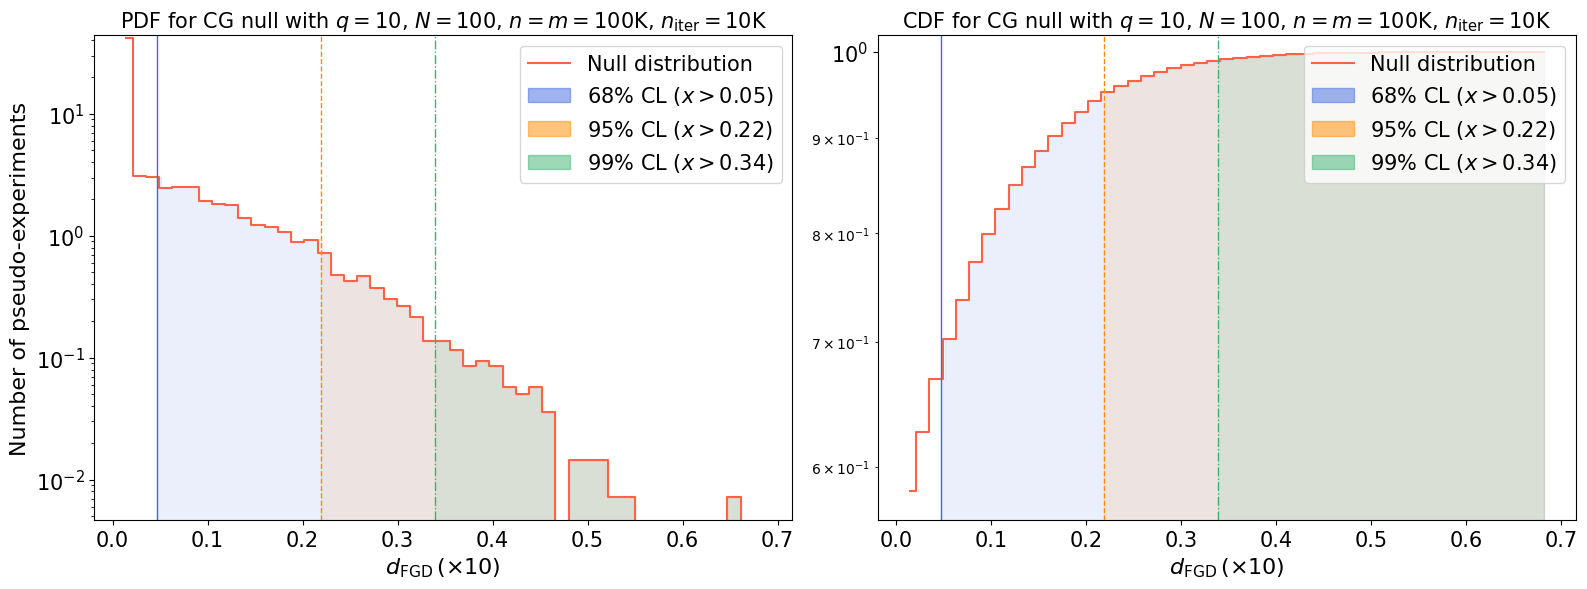

Time elapsed: 1.5866875099018216 seconds.
mu = 0.00036010554206766283 +/- 3.1045788938868944e-05
sigma = 0.05571874813639386 +/- 0.0005410868698089189
68%CL = 0.018560537190887773, 95%CL = 0.10112527756913323, 99%CL = 0.1649274847672359
mu = 0.00036010554206766283 +/- 3.1045788938868944e-05
sigma = 0.05571874813639386 +/- 0.0005410868698089189


/tmp/ipykernel_3788669/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3788669/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3788669/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3788669/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


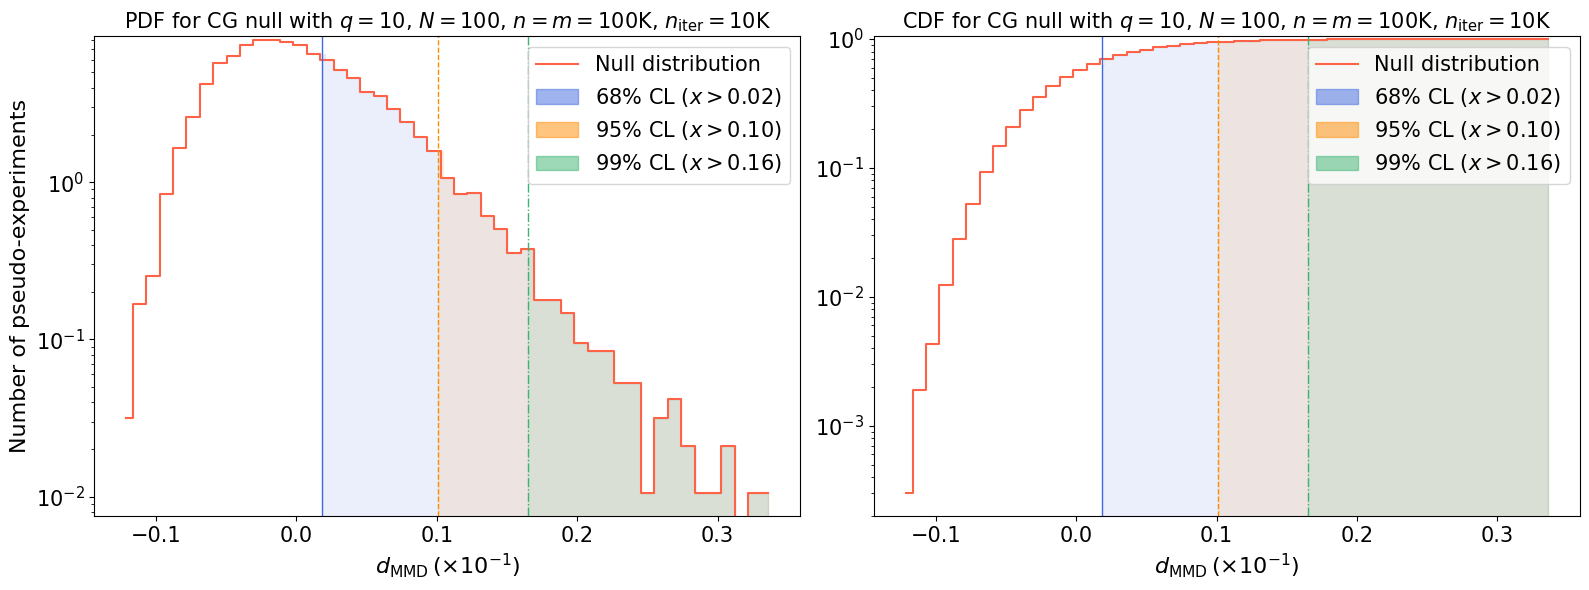

Time elapsed: 0.9634874677285552 seconds.
mu = 0.8673405005092222 +/- 5.317005788809075e-05
sigma = 0.07291780159062035 +/- 0.0005631416590682759
68%CL = 0.8967765315487999, 95%CL = 0.9967509872322343, 99%CL = 1.0625355563878416
mu = 0.8673405005092222 +/- 5.317005788809075e-05
sigma = 0.07291780159062035 +/- 0.0005631416590682759


/tmp/ipykernel_3788669/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3788669/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3788669/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3788669/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


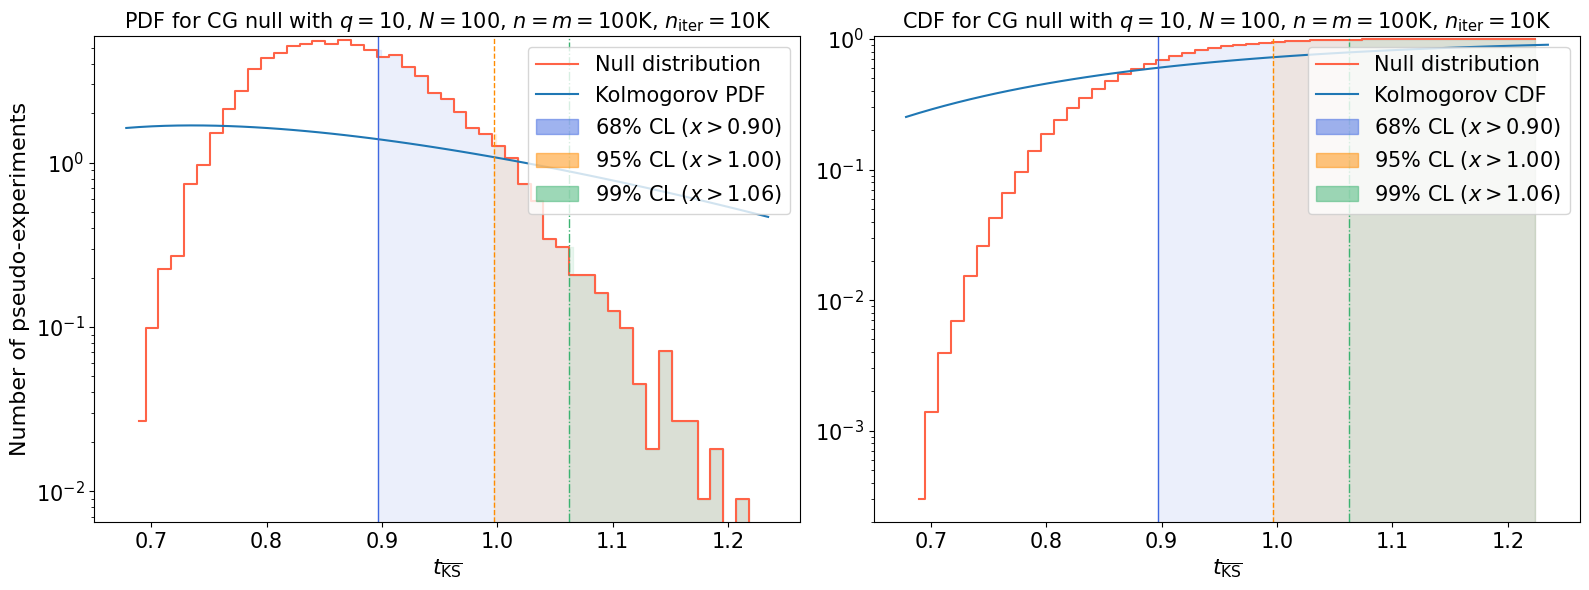

Time elapsed: 1.3092206744477153 seconds.
mu = 0.8664271382480773 +/- 5.354340692752686e-05
sigma = 0.07317336054024501 +/- 0.0005615827324644421
68%CL = 0.8947858400838061, 95%CL = 0.9973319174306536, 99%CL = 1.063900298156752
mu = 0.8664271382480773 +/- 5.354340692752686e-05
sigma = 0.07317336054024501 +/- 0.0005615827324644421


/tmp/ipykernel_3788669/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3788669/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3788669/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3788669/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


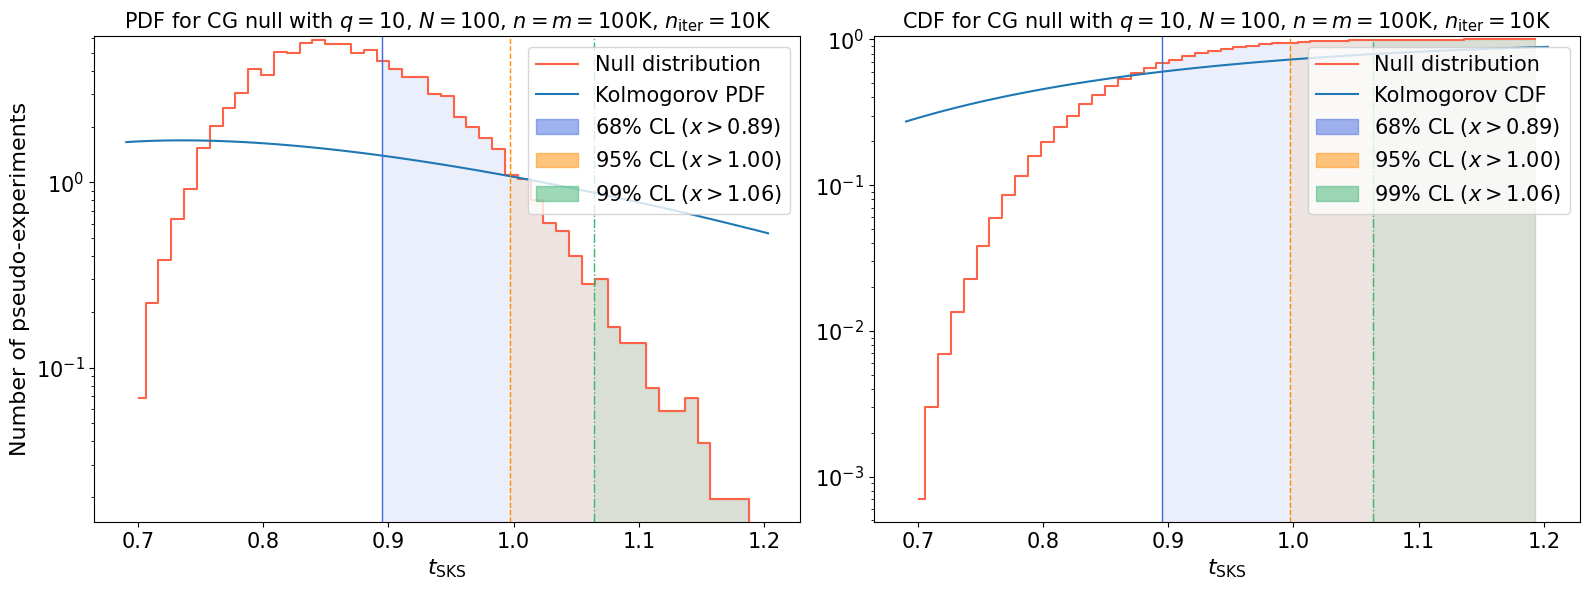

Time elapsed: 1.2630605455487967 seconds.
mu = 0.36753293532347897 +/- 1.8341383577455578e-05
sigma = 0.042826841556967025 +/- 0.00036086949440046815
68%CL = 0.38191676389110646, 95%CL = 0.44644382163043517, 99%CL = 0.49265054812285863
mu = 0.36753293532347897 +/- 1.8341383577455578e-05
sigma = 0.042826841556967025 +/- 0.00036086949440046815


/tmp/ipykernel_3788669/2009291306.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_3788669/2009291306.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_3788669/2009291306.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_3788669/2009291306.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


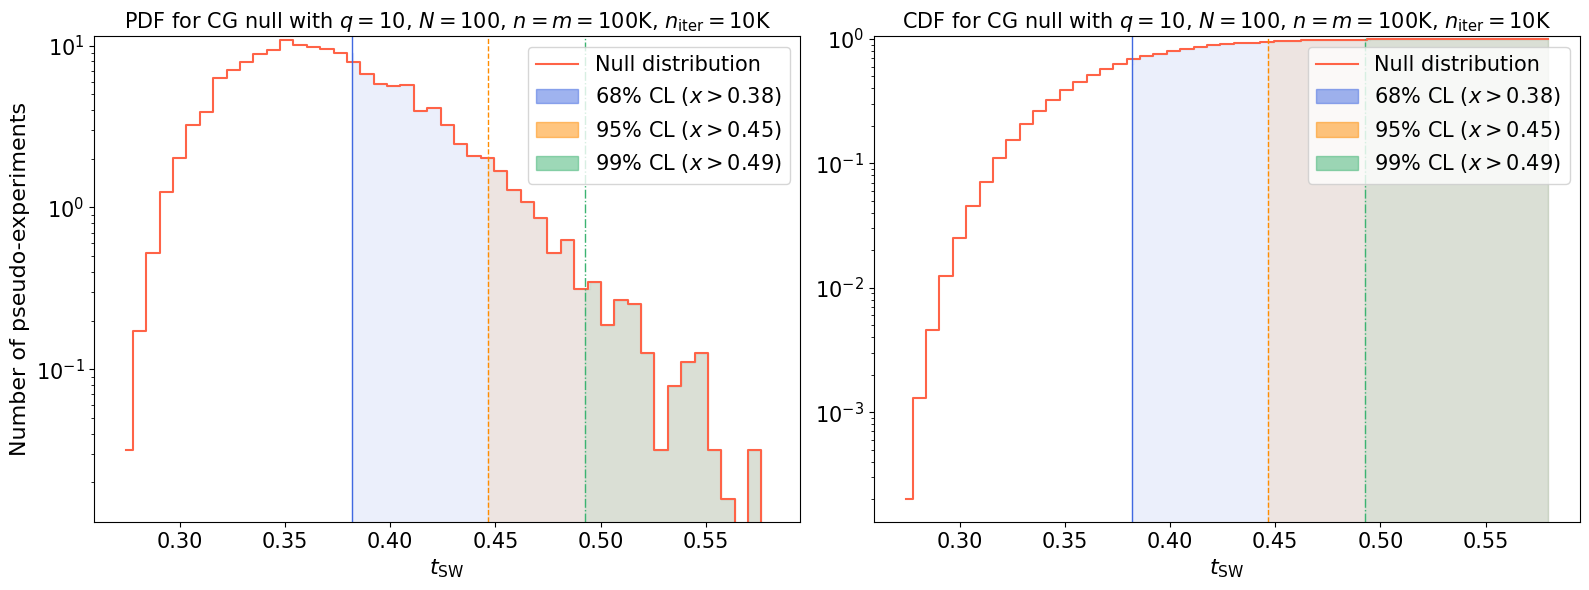

Time elapsed: 0.9712361404672265 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fd64ad745e0>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{FGD}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.00466890665832056], [0...",results/100D_unimodal/100D_100K/null_hypothesi...
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 20000, 'normalise'...",metric_list,<function <lambda> at 0x7fd64ad74680>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 100000, 'b...",1,$t_{\mathrm{MMD}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.18560537190887771], [0...",results/100D_unimodal/100D_100K/null_hypothesi...
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fd64ad74720>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$t_{\overline{\mathrm{KS}}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.8967765315487999], [0....",results/100D_unimodal/100D_100K/null_hypothesi...
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fd64ad747c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{SKS}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.8947858400838061], [0....",results/100D_unimodal/100D_100K/null_hypothesi...
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fd64ad74860>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{SW}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.38191676389110646], [0...",results/100D_unimodal/100D_100K/null_hypothesi...
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fd64ad74900>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mathrm{LLR}}$,results/100D_unimodal/100D_100K/null_hypothesi...,[],NaN


In [12]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    if "FGD" in latex:
        latex = r"$d_{\mathrm{FGD}}\,(\times 10)$"
        dist_null = dist_null * 10
    elif "MMD" in latex:
        latex = r"$d_{\mathrm{MMD}}\,(\times 10^{-1})$"
        dist_null = dist_null / 10
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for CG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        if "FGD" in latex:
            threshold_value = threshold_value * 10
        elif "MMD" in latex:
            threshold_value = threshold_value / 10
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for CG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        if "FGD" in latex:
            threshold_value = threshold_value * 10
        elif "MMD" in latex:
            threshold_value = threshold_value / 10
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [13]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [14]:
file_path = os.path.join(model_dir, "exclusion_limits.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [15]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        eps_max = 2.
        for bound in bounds:
            try:
                result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
            except:
                result = {}
            if result == {}:
                print(f"Computing {bound} bounds for {metric_config['name']} with {deformation} deformation.")
                result = compute_exclusion_bisection(dist_1,
                                                     metric_config = metric_config,
                                                     test_kwargs = test_kwargs,
                                                     model_dir = model_dir,
                                                     deformation = deformation,
                                                     seed_dist = 0,
                                                     x_tol = 0.01,
                                                     fn_tol = 0.08,
                                                     bound = bound,
                                                     eps_min = 0.,
                                                     eps_max = eps_max,
                                                     max_iterations = 50,
                                                     save = True,
                                                     filename = "exclusion_limits.json",
                                                     verbose = True)
                eps_max = list(result.values())[0]["exclusion_list"][-1][3]
            else:
                print(f"{bound.capitalize()} bounds for {metric_config['name']} with {deformation} deformation already loaded.")
            global_results.update(result)
print(global_results.keys())

Upper bounds for fgd with mean deformation already loaded.
Central bounds for fgd with mean deformation already loaded.
Lower bounds for fgd with mean deformation already loaded.
Upper bounds for fgd with cov_diag deformation already loaded.
Central bounds for fgd with cov_diag deformation already loaded.
Lower bounds for fgd with cov_diag deformation already loaded.
Upper bounds for fgd with cov_off_diag deformation already loaded.
Computing central bounds for fgd with cov_off_diag deformation.

=============== fgd - cov_off_diag ===============

------------ 1 - 0.95 CL - central bound -----------
eps = 1.0 - deformation = cov_off_diag


I0000 00:00:1722257550.260224 3788669 service.cc:145] XLA service 0x1104a25a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722257550.260268 3788669 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
I0000 00:00:1722257553.214155 3788669 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-07-29 14:57:26.184184: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_7004__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6663] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-29 14:57:55.807265: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m

statistic = 868.980230551673 - next threshold = 0.02191486315716365 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9998991263104573

------------ 2 - 0.95 CL - central bound -----------
eps = 0.5 - deformation = cov_off_diag


2024-07-29 15:08:58.930048: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m28.652727003s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_16204__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6663] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 484.989441949459 - next threshold = 0.02191486315716365 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9998192630927143

------------ 3 - 0.95 CL - central bound -----------
eps = 0.25 - deformation = cov_off_diag


2024-07-29 15:19:40.081557: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m20.149381809s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_24877__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6663] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 209.96014464624923 - next threshold = 0.02191486315716365 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.999582538370976

------------ 4 - 0.95 CL - central bound -----------
eps = 0.125 - deformation = cov_off_diag
statistic = 84.51516958443031 - next threshold = 0.02191486315716365 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9989630651068526

------------ 5 - 0.95 CL - central bound -----------
eps = 0.0625 - deformation = cov_off_diag
statistic = 31.574675613432774 - next threshold = 0.02191486315716365 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9972256673487094

------------ 6 - 0.95 CL - central bound -----------
eps = 0.03125 - deformation = cov_off_diag
statistic = 10.821425546306067 - next threshold = 0.02191486315716365 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9919158258139573

------------ 7 - 0.95 CL - central bound -----------
eps = 0.015625 - deformation = cov_off_diag
statistic = 3.413580

2024-07-29 18:31:30.263280: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_207057__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6690] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-29 18:32:06.849481: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m36.586320008s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_207057__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6690] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 869.2159023881142 - next threshold = 0.03391472759791333 at 0.99 CL
relative_error_eps = 1.995208781077208
relative_error_metric = 1.9998439356468987

------------ 3 - 0.99 CL - central bound -----------
eps = 0.5008999705314636 - deformation = cov_off_diag


2024-07-29 18:42:56.492304: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m29.854970906s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_215730__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6663] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 485.88891333783386 - next threshold = 0.03391472759791333 at 0.99 CL
relative_error_eps = 1.9904404630715282
relative_error_metric = 1.9997208221088691

------------ 4 - 0.99 CL - central bound -----------
eps = 0.2510499656200409 - deformation = cov_off_diag


2024-07-29 18:53:10.080938: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_224403__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6663] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-29 18:53:21.854131: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m11.773257476s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_224403__XlaMustCompile_true_config_proto_8589078909834744431_executor_type_11160318154034397263_.6663] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 211.05387882927448 - next threshold = 0.03391472759791333 at 0.99 CL
relative_error_eps = 1.9809718761692763
relative_error_metric = 1.999357334177852

------------ 5 - 0.99 CL - central bound -----------
eps = 0.12612496316432953 - deformation = cov_off_diag
statistic = 85.51854262293423 - next threshold = 0.03391472759791333 at 0.99 CL
relative_error_eps = 1.9623024095481711
relative_error_metric = 1.998414318950117

------------ 6 - 0.99 CL - central bound -----------
eps = 0.06366246193647385 - deformation = cov_off_diag
statistic = 32.39468119535444 - next threshold = 0.03391472759791333 at 0.99 CL
relative_error_eps = 1.9259996367891472
relative_error_metric = 1.9958166887424311

------------ 7 - 0.99 CL - central bound -----------
eps = 0.032431211322546005 - deformation = cov_off_diag
statistic = 11.51706207778884 - next threshold = 0.03391472759791333 at 0.99 CL
relative_error_eps = 1.857279941655768
relative_error_metric = 1.9882556330362995

------------ 8 - 0.99

2024-07-29 23:31:16.114603: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_493336__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-29 23:31:51.000432: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m34.885906851s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_493336__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 4085.8314831684 - next threshold = 1.0112527756913323 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9990102356845814

------------ 2 - 0.95 CL - upper bound -----------
eps = 0.5 - deformation = cov_off_diag


2024-07-29 23:40:22.130644: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_506673__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-29 23:40:44.717622: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m22.587070705s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_506673__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 2433.465610628954 - next threshold = 1.0112527756913323 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.998338447506497

------------ 3 - 0.95 CL - upper bound -----------
eps = 0.25 - deformation = cov_off_diag


2024-07-29 23:48:57.037372: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m5.851639483s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_519707__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 889.714191543593 - next threshold = 1.0112527756913323 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9954587453085988

------------ 4 - 0.95 CL - upper bound -----------
eps = 0.125 - deformation = cov_off_diag
statistic = 265.66152768607105 - next threshold = 1.0112527756913323 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9848315561274716

------------ 5 - 0.95 CL - upper bound -----------
eps = 0.0625 - deformation = cov_off_diag
statistic = 70.61915223433519 - next threshold = 1.0112527756913323 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9435294118161257

------------ 6 - 0.95 CL - upper bound -----------
eps = 0.03125 - deformation = cov_off_diag
statistic = 17.179356993854533 - next threshold = 1.0112527756913323 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.77763191261805

------------ 7 - 0.95 CL - upper bound -----------
eps = 0.015625 - deformation = cov_off_diag
statistic = 3.681639038090786 - nex

2024-07-30 01:26:48.004518: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_702230__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 01:27:29.154204: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m41.149893665s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_702230__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 4085.160700612426 - next threshold = 1.649274847672359 at 0.99 CL
relative_error_eps = 1.961382877938014
relative_error_metric = 1.998385758224556

------------ 3 - 0.99 CL - upper bound -----------
eps = 0.5073471069335938 - deformation = cov_off_diag


2024-07-30 01:36:04.524127: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_715276__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 01:36:22.445734: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m17.921676552s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_715276__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 2476.937810265278 - next threshold = 1.649274847672359 at 0.99 CL
relative_error_eps = 1.9242287889293777
relative_error_metric = 1.997338362880081

------------ 4 - 0.99 CL - upper bound -----------
eps = 0.2585716247558594 - deformation = cov_off_diag


2024-07-30 01:44:51.764310: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_728310__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 01:45:17.306285: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.542039148s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_728310__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 939.7052660845509 - next threshold = 1.649274847672359 at 0.99 CL
relative_error_eps = 1.8539892823129736
relative_error_metric = 1.992991907826613

------------ 5 - 0.99 CL - upper bound -----------
eps = 0.1341838836669922 - deformation = cov_off_diag
statistic = 301.7696828301288 - next threshold = 1.649274847672359 at 0.99 CL
relative_error_eps = 1.727847178984461
relative_error_metric = 1.978257458132544

------------ 6 - 0.99 CL - upper bound -----------
eps = 0.0719900131225586 - deformation = cov_off_diag
statistic = 92.98199524796836 - next threshold = 1.649274847672359 at 0.99 CL
relative_error_eps = 1.5208899357501837
relative_error_metric = 1.9302862638954126

------------ 7 - 0.99 CL - upper bound -----------
eps = 0.0408930778503418 - deformation = cov_off_diag
statistic = 29.97027581328965 - next threshold = 1.649274847672359 at 0.99 CL
relative_error_eps = 1.2269644318598723
relative_error_metric = 1.7913601157263022

------------ 8 - 0.99 CL - upper bound -

2024-07-30 06:44:14.455824: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1301805__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 06:44:38.759140: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m24.303390278s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1301805__.8763] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 0.7920499215134765 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.6666666666666666
relative_error_metric = 0.22886959048147187

------------ 2 - 0.95 CL - upper bound -----------
eps = 1.5 - deformation = cov_off_diag


2024-07-30 06:50:40.165391: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1311648__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 06:51:03.642166: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m23.476836452s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1311648__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 12.026627184655577 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.4
relative_error_metric = 1.6938579302307861

------------ 3 - 0.95 CL - upper bound -----------
eps = 1.25 - deformation = cov_off_diag


2024-07-30 06:57:08.169863: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1321321__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 06:57:34.450263: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m26.280499855s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1321321__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 6.610448666026123 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.2222222222222222
relative_error_metric = 1.4758907179173086

------------ 4 - 0.95 CL - upper bound -----------
eps = 1.125 - deformation = cov_off_diag


2024-07-30 07:03:32.017160: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1330994__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:03:54.393278: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m22.376191751s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1330994__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 3.624644365338034 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.11764705882352941
relative_error_metric = 1.1372726969330818

------------ 5 - 0.95 CL - upper bound -----------
eps = 1.0625 - deformation = cov_off_diag


2024-07-30 07:10:21.284978: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m23.801803179s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1340667__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 2.0740745682229544 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.06060606060606061
relative_error_metric = 0.701650785129687

------------ 6 - 0.95 CL - upper bound -----------
eps = 1.03125 - deformation = cov_off_diag


2024-07-30 07:16:27.939699: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1350340__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:16:52.980365: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.040742643s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1350340__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 1.3127023188108096 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.03076923076923077
relative_error_metric = 0.27361569142951664

------------ 7 - 0.95 CL - upper bound -----------
eps = 1.015625 - deformation = cov_off_diag


2024-07-30 07:23:02.413003: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1360013__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:23:27.884048: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.471112367s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1360013__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 0.9713365400677985 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.015267175572519083
relative_error_metric = 0.025826541565761835

------------ 8 - 0.95 CL - upper bound -----------
eps = 1.0234375 - deformation = cov_off_diag


2024-07-30 07:29:34.652430: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1369686__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:30:00.293569: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.64120008s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1369686__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 1.1342773261840515 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.007662835249042145
relative_error_metric = 0.12907040050664226

------------ 9 - 0.95 CL - upper bound -----------
eps = 1.01953125 - deformation = cov_off_diag


2024-07-30 07:36:06.408972: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1379359__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:36:31.648566: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.239656945s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1379359__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 1.0500895358648854 - next threshold = 0.9967509872322343 at 0.95 CL
relative_error_eps = 0.003838771593090211
relative_error_metric = 0.05211793301018229
=======> statistic within required accuracy at 0.95 CL in 3499.0777865005657 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 - 0.99 CL - upper bound -----------
eps = 1.017578125 - deformation = cov_off_diag


2024-07-30 07:42:37.149928: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1389032__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:43:02.036634: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m24.886760002s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1389032__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 1.0099355961679315 - next threshold = 1.0625355563878416 at 0.99 CL
relative_error_eps = 0.6511326860841424
relative_error_metric = 0.05076061990541463

------------ 2 - 0.99 CL - upper bound -----------
eps = 1.5087890625 - deformation = cov_off_diag


2024-07-30 07:49:07.701379: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1398705__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:49:32.962588: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.261294282s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1398705__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 12.204596032276479 - next threshold = 1.0625355563878416 at 0.99 CL
relative_error_eps = 0.38886741399304214
relative_error_metric = 1.6796487471954553

------------ 3 - 0.99 CL - upper bound -----------
eps = 1.26318359375 - deformation = cov_off_diag


2024-07-30 07:55:38.715114: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1408378__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 07:56:04.348928: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.633874691s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1408378__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 6.914309825025361 - next threshold = 1.0625355563878416 at 0.99 CL
relative_error_eps = 0.2153714408049668
relative_error_metric = 1.4671900955414536

------------ 4 - 0.99 CL - upper bound -----------
eps = 1.140380859375 - deformation = cov_off_diag


2024-07-30 08:02:13.039405: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1418051__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 08:02:39.630390: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m26.591048254s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1418051__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 4.0016544581567635 - next threshold = 1.0625355563878416 at 0.99 CL
relative_error_eps = 0.11381377983934834
relative_error_metric = 1.1607459014482577

------------ 5 - 0.99 CL - upper bound -----------
eps = 1.0789794921875 - deformation = cov_off_diag


2024-07-30 08:08:46.979461: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1427724__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 08:09:14.450937: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m27.471538869s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1427724__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 2.4840390298214494 - next threshold = 1.0625355563878416 at 0.99 CL
relative_error_eps = 0.058573508005822415
relative_error_metric = 0.8016205151647257

------------ 6 - 0.99 CL - upper bound -----------
eps = 1.04827880859375 - deformation = cov_off_diag


2024-07-30 08:15:27.236756: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1437397__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-07-30 08:15:53.165964: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m25.929286052s

********************************
[Compiling module a_inference_generate_and_clean_data_simple_1_1437397__.8793] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


statistic = 1.722780137736349 - next threshold = 1.0625355563878416 at 0.99 CL
relative_error_eps = 0.029721984223121695
relative_error_metric = 0.47408958542210305

------------ 7 - 0.99 CL - upper bound -----------
eps = 1.032928466796875 - deformation = cov_off_diag


### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down"]
eps_max_def = []
bounds = ["upper", "central", "lower"]

for deformation in deformations:
    eps_max = 2.
    for bound in bounds:
        try:
            result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation and v["bound"] == bound}
        except:
            result = {}
        if result == {}:
            print(f"Computing {bound} bounds for lr with {deformation} deformation.")
            result = compute_exclusion_LR_bisection(dist_1,
                                                    metric_config = metrics_config[unique_key]["lr"],
                                                    test_kwargs = test_kwargs,
                                                    model_dir = model_dir,
                                                    cl_list = [0.95, 0.99],
                                                    deformation = deformation,
                                                    seed_dist = 0,
                                                    x_tol = 0.01,
                                                    fn_tol = 0.05,
                                                    bound = bound,
                                                    eps_min = 0.,
                                                    eps_max = eps_max,
                                                    max_iterations = 50,
                                                    save = True,
                                                    filename = "exclusion_limits.json",
                                                    verbose = True)
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]
        else:
            print(f"{bound.capitalize()} bounds for lr with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Upper bounds for lr with mean deformation already loaded.
Central bounds for lr with mean deformation already loaded.
Lower bounds for lr with mean deformation already loaded.
Upper bounds for lr with cov_diag deformation already loaded.
Central bounds for lr with cov_diag deformation already loaded.
Lower bounds for lr with cov_diag deformation already loaded.
Upper bounds for lr with cov_off_diag deformation already loaded.
Central bounds for lr with cov_off_diag deformation already loaded.
Lower bounds for lr with cov_off_diag deformation already loaded.
Upper bounds for lr with power_abs_up deformation already loaded.
Central bounds for lr with power_abs_up deformation already loaded.
Lower bounds for lr with power_abs_up deformation already loaded.
Upper bounds for lr with power_abs_down deformation already loaded.
Central bounds for lr with power_abs_down deformation already loaded.
Lower bounds for lr with power_abs_down deformation already loaded.
dict_keys(['fgd_mean_upper_202

## Show and save results

In [ ]:
import notebooks.shared as shared

In [ ]:
results_df, times_df = shared.generate_result_dataframe(global_results, null_times)

Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
M

In [ ]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm {CL}}$,$t^{\mu}$ (s)
35,swd,$0.02667_{-0.0098}^{+0.0083}$,$0.03433_{-0.008}^{+0.0074}$,$725$
9,ks,$0.02531_{-0.0089}^{+0.0078}$,$0.03236_{-0.0079}^{+0.0073}$,$1179$
28,sks,$0.02742_{-0.01}^{+0.0084}$,$0.03493_{-0.0086}^{+0.0077}$,$1219$
2,fgd,$0.0292_{-0.011}^{+0.01}$,$0.03631_{-0.0088}^{+0.0089}$,$18261$
21,mmd,$0.0207_{-0.0077}^{+0.0092}$,$0.02578_{-0.0071}^{+0.0087}$,$13097$
16,lr,$0.00164_{-0.0012}^{+0.0012}$,$0.00237_{-0.0012}^{+0.0012}$,$15370$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
33,swd,$0.01065_{-0.0038}^{+0.0031}$,$0.01351_{-0.003}^{+0.0028}$,$753$
7,ks,$0.0127_{-0.0049}^{+0.0042}$,$0.01612_{-0.0042}^{+0.004}$,$1267$
26,sks,$0.01323_{-0.0052}^{+0.0042}$,$0.01674_{-0.0043}^{+0.0038}$,$1311$
0,fgd,$0.0095_{-0.0031}^{+0.0028}$,$0.01169_{-0.0026}^{+0.0026}$,$18550$
19,mmd,$0.01289_{-0.0045}^{+0.005}$,$0.01617_{-0.004}^{+0.0047}$,$11384$
14,lr,$0.00031_{-0.00022}^{+0.00021}$,$0.00045_{-0.00022}^{+0.00022}$,$16289$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
34,swd,$0.01128_{-0.0043}^{+0.0033}$,$0.01494_{-0.0034}^{+0.0029}$,$749$
8,ks,$1.00632_{-0.00025}^{+0.00076}$,$1.00829_{-0.00098}^{+0.00074}$,$853$
27,sks,$0.01278_{-0.0058}^{+0.0047}$,$0.01672_{-0.0048}^{+0.0043}$,$1302$
1,fgd,$0.00106_{-0.00035}^{+0.00027}$,$0.00132_{-0.00027}^{+0.00023}$,$20591$
20,mmd,$0.00667_{-0.0027}^{+0.0029}$,$0.00858_{-0.0024}^{+0.0027}$,$11714$
15,lr,$1e-05_{-1e-05}^{+1e-05}$,$2e-05_{-1e-05}^{+0}$,$23567$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm {pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
37,swd,$0.00229_{-0.00082}^{+0.00068}$,$0.00293_{-0.00067}^{+0.00062}$,$797$
11,ks,$0.0027_{-0.00094}^{+0.0008}$,$0.0034_{-0.0008}^{+0.00073}$,$1351$
30,sks,$0.00254_{-0.00093}^{+0.00073}$,$0.00319_{-0.00074}^{+0.00067}$,$1405$
4,fgd,$0.00232_{-0.0008}^{+0.00071}$,$0.00286_{-0.00066}^{+0.00064}$,$19919$
23,mmd,$0.00163_{-0.0006}^{+0.00076}$,$0.00205_{-0.00058}^{+0.00071}$,$12499$
18,lr,$0.0001_{-7e-05}^{+7e-05}$,$0.00015_{-7e-05}^{+7e-05}$,$21800$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^ {\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
36,swd,$0.00229_{-0.00096}^{+5}$,$0.00293_{-0.00079}^{+5}$,$717$
10,ks,$0.0027_{-0.001}^{+0.00084}$,$0.0034_{-0.00085}^{+0.00073}$,$1373$
29,sks,$0.00253_{-0.0011}^{+0.00087}$,$0.00316_{-0.00092}^{+0.0008}$,$1404$
3,fgd,$0.00225_{-0.00086}^{+0.00076}$,$0.00278_{-0.0007}^{+0.00071}$,$20138$
22,mmd,$0.00143_{-0.00064}^{+0.00077}$,$0.00185_{-0.0006}^{+0.00073}$,$12506$
17,lr,$0.00012_{-7e-05}^{+7e-05}$,$0.00017_{-7e-05}^{+7e-05}$,$17336$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
38,swd,$0.28179_{-0.054}^{+0.039}$,$0.32012_{-0.037}^{+0.032}$,$619$
12,ks,$0.3116_{-0.067}^{+0.049}$,$0.35101_{-0.049}^{+0.042}$,$1063$
31,sks,$0.30315_{-0.07}^{+0.045}$,$0.34204_{-0.05}^{+0.037}$,$1102$
5,fgd,$0.13244_{-0.023}^{+0.016}$,$0.1479_{-0.016}^{+0.011}$,$15260$
24,mmd,$0.68952_{-0.098}^{+0.078}$,$0.77914_{-0.067}^{+0.057}$,$8037$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
39,swd,$0.4924_{-0.098}^{+0.067}$,$0.55614_{-0.064}^{+0.053}$,$588$
13,ks,$0.54132_{-0.12}^{+0.081}$,$0.60655_{-0.083}^{+0.069}$,$1034$
32,sks,$0.52074_{-0.12}^{+0.082}$,$0.59085_{-0.087}^{+0.066}$,$1039$
6,fgd,$0.22963_{-0.04}^{+0.025}$,$0.25498_{-0.028}^{+0.021}$,$14613$
25,mmd,$1.19904_{-0.18}^{+0.13}$,$1.34688_{-0.12}^{+0.11}$,$8790$


In [ ]:
sorted_df_mean, sorted_df_cov_diag, sorted_df_cov_off_diag, sorted_df_power_abs_up, sorted_df_power_abs_down, sorted_df_random_normal, sorted_df_random_uniform = shared.get_sorted_dfs(results_df, show = True)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm {CL}}$,$t^{\mu}$ (s),95%CL,99%CL,time
16,lr,mean,100,10000,100000,$0.00164_{-0.0012}^{+0.0012}$,$0.00237_{-0.0012}^{+0.0012}$,$15370$,"[0.00043, 0.00164, 0.00286]","[0.00116, 0.00237, 0.00358]","[5765.39105031779, 4397.264296209905, 5207.777..."
21,mmd,mean,100,10000,100000,$0.0207_{-0.0077}^{+0.0092}$,$0.02578_{-0.0071}^{+0.0087}$,$13097$,"[0.013, 0.0207, 0.02991]","[0.01872, 0.02578, 0.03453]","[4870.071748065995, 2920.2939369300148, 5307.5..."
9,ks,mean,100,10000,100000,$0.02531_{-0.0089}^{+0.0078}$,$0.03236_{-0.0079}^{+0.0073}$,$1179$,"[0.01637, 0.02531, 0.03311]","[0.02443, 0.03236, 0.03963]","[565.5569926090539, 298.51522495178506, 315.16..."
35,swd,mean,100,10000,100000,$0.02667_{-0.0098}^{+0.0083}$,$0.03433_{-0.008}^{+0.0074}$,$725$,"[0.01683, 0.02667, 0.03494]","[0.02634, 0.03433, 0.04176]","[357.7841475959867, 174.23079906404018, 193.03..."
28,sks,mean,100,10000,100000,$0.02742_{-0.01}^{+0.0084}$,$0.03493_{-0.0086}^{+0.0077}$,$1219$,"[0.01699, 0.02742, 0.03586]","[0.02631, 0.03493, 0.04268]","[591.8627403536811, 302.8207272090949, 324.610..."
2,fgd,mean,100,10000,100000,$0.0292_{-0.011}^{+0.01}$,$0.03631_{-0.0088}^{+0.0089}$,$18261$,"[0.01851, 0.0292, 0.03918]","[0.02748, 0.03631, 0.04517]","[8210.291100264993, 4907.278854707023, 5143.98..."


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm {CL}}$,$t^{\mu}$ (s)
16,lr,$0.00164_{-0.0012}^{+0.0012}$,$0.00237_{-0.0012}^{+0.0012}$,$15370$
21,mmd,$0.0207_{-0.0077}^{+0.0092}$,$0.02578_{-0.0071}^{+0.0087}$,$13097$
9,ks,$0.02531_{-0.0089}^{+0.0078}$,$0.03236_{-0.0079}^{+0.0073}$,$1179$
35,swd,$0.02667_{-0.0098}^{+0.0083}$,$0.03433_{-0.008}^{+0.0074}$,$725$
28,sks,$0.02742_{-0.01}^{+0.0084}$,$0.03493_{-0.0086}^{+0.0077}$,$1219$
2,fgd,$0.0292_{-0.011}^{+0.01}$,$0.03631_{-0.0088}^{+0.0089}$,$18261$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s),95%CL,99%CL,time
14,lr,cov_diag,100,10000,100000,$0.00031_{-0.00022}^{+0.00021}$,$0.00045_{-0.00022}^{+0.00022}$,$16289$,"[9e-05, 0.00031, 0.00052]","[0.00023, 0.00045, 0.00067]","[6902.550409836229, 4418.391581343953, 4968.97..."
0,fgd,cov_diag,100,10000,100000,$0.0095_{-0.0031}^{+0.0028}$,$0.01169_{-0.0026}^{+0.0026}$,$18550$,"[0.00637, 0.0095, 0.01227]","[0.00907, 0.01169, 0.01426]","[8742.039774571953, 4911.354275213962, 4896.66..."
33,swd,cov_diag,100,10000,100000,$0.01065_{-0.0038}^{+0.0031}$,$0.01351_{-0.003}^{+0.0028}$,$753$,"[0.00689, 0.01065, 0.01377]","[0.01046, 0.01351, 0.01628]","[384.2522536399774, 177.7365300967358, 191.306..."
7,ks,cov_diag,100,10000,100000,$0.0127_{-0.0049}^{+0.0042}$,$0.01612_{-0.0042}^{+0.004}$,$1267$,"[0.00778, 0.0127, 0.01686]","[0.01192, 0.01612, 0.02013]","[629.5701220948249, 310.3818597733043, 327.532..."
19,mmd,cov_diag,100,10000,100000,$0.01289_{-0.0045}^{+0.005}$,$0.01617_{-0.004}^{+0.0047}$,$11384$,"[0.00837, 0.01289, 0.01788]","[0.01212, 0.01617, 0.02082]","[5315.983433759073, 2941.458355576033, 3126.82..."
26,sks,cov_diag,100,10000,100000,$0.01323_{-0.0052}^{+0.0042}$,$0.01674_{-0.0043}^{+0.0038}$,$1311$,"[0.00801, 0.01323, 0.01747]","[0.01241, 0.01674, 0.02059]","[653.6404993981123, 314.145658581052, 343.7040..."


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
14,lr,$0.00031_{-0.00022}^{+0.00021}$,$0.00045_{-0.00022}^{+0.00022}$,$16289$
0,fgd,$0.0095_{-0.0031}^{+0.0028}$,$0.01169_{-0.0026}^{+0.0026}$,$18550$
33,swd,$0.01065_{-0.0038}^{+0.0031}$,$0.01351_{-0.003}^{+0.0028}$,$753$
7,ks,$0.0127_{-0.0049}^{+0.0042}$,$0.01612_{-0.0042}^{+0.004}$,$1267$
19,mmd,$0.01289_{-0.0045}^{+0.005}$,$0.01617_{-0.004}^{+0.0047}$,$11384$
26,sks,$0.01323_{-0.0052}^{+0.0042}$,$0.01674_{-0.0043}^{+0.0038}$,$1311$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s),95%CL,99%CL,time
15,lr,cov_off_diag,100,10000,100000,$1e-05_{-1e-05}^{+1e-05}$,$2e-05_{-1e-05}^{+0}$,$23567$,"[0.0, 1e-05, 2e-05]","[1e-05, 2e-05, 2e-05]","[11960.096451948863, 5461.468660345767, 6146.2..."
1,fgd,cov_off_diag,100,10000,100000,$0.00106_{-0.00035}^{+0.00027}$,$0.00132_{-0.00027}^{+0.00023}$,$20591$,"[0.00071, 0.00106, 0.00133]","[0.00105, 0.00132, 0.00155]","[10954.21839699999, 4818.389792383998, 4818.48..."
20,mmd,cov_off_diag,100,10000,100000,$0.00667_{-0.0027}^{+0.0029}$,$0.00858_{-0.0024}^{+0.0027}$,$11714$,"[0.004, 0.00667, 0.00955]","[0.00617, 0.00858, 0.01127]","[5660.850898165954, 2928.177256657975, 3125.08..."
34,swd,cov_off_diag,100,10000,100000,$0.01128_{-0.0043}^{+0.0033}$,$0.01494_{-0.0034}^{+0.0029}$,$749$,"[0.00703, 0.01128, 0.01461]","[0.01157, 0.01494, 0.01788]","[373.7660786351189, 182.90744902566075, 192.77..."
27,sks,cov_off_diag,100,10000,100000,$0.01278_{-0.0058}^{+0.0047}$,$0.01672_{-0.0048}^{+0.0043}$,$1302$,"[0.00696, 0.01278, 0.01747]","[0.01188, 0.01672, 0.02104]","[649.0611548838206, 316.3312799227424, 337.036..."
8,ks,cov_off_diag,100,10000,100000,$1.00632_{-0.00025}^{+0.00076}$,$1.00829_{-0.00098}^{+0.00074}$,$853$,"[1.00607, 1.00632, 1.00708]","[1.00731, 1.00829, 1.00903]","[448.66950390907004, 224.11365686822683, 180.9..."


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
15,lr,$1e-05_{-1e-05}^{+1e-05}$,$2e-05_{-1e-05}^{+0}$,$23567$
1,fgd,$0.00106_{-0.00035}^{+0.00027}$,$0.00132_{-0.00027}^{+0.00023}$,$20591$
20,mmd,$0.00667_{-0.0027}^{+0.0029}$,$0.00858_{-0.0024}^{+0.0027}$,$11714$
34,swd,$0.01128_{-0.0043}^{+0.0033}$,$0.01494_{-0.0034}^{+0.0029}$,$749$
27,sks,$0.01278_{-0.0058}^{+0.0047}$,$0.01672_{-0.0048}^{+0.0043}$,$1302$
8,ks,$1.00632_{-0.00025}^{+0.00076}$,$1.00829_{-0.00098}^{+0.00074}$,$853$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm {pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s),95%CL,99%CL,time
18,lr,power_abs_up,100,10000,100000,$0.0001_{-7e-05}^{+7e-05}$,$0.00015_{-7e-05}^{+7e-05}$,$21800$,"[3e-05, 0.0001, 0.00017]","[8e-05, 0.00015, 0.00022]","[8117.3291002612095, 8378.822786048055, 5304.1..."
23,mmd,power_abs_up,100,10000,100000,$0.00163_{-0.0006}^{+0.00076}$,$0.00205_{-0.00058}^{+0.00071}$,$12499$,"[0.00103, 0.00163, 0.00239]","[0.00147, 0.00205, 0.00276]","[6444.692822044715, 2930.599756028969, 3124.57..."
37,swd,power_abs_up,100,10000,100000,$0.00229_{-0.00082}^{+0.00068}$,$0.00293_{-0.00067}^{+0.00062}$,$797$,"[0.00147, 0.00229, 0.00297]","[0.00226, 0.00293, 0.00355]","[426.6019820882939, 183.86929185921326, 187.41..."
4,fgd,power_abs_up,100,10000,100000,$0.00232_{-0.0008}^{+0.00071}$,$0.00286_{-0.00066}^{+0.00064}$,$19919$,"[0.00152, 0.00232, 0.00303]","[0.0022, 0.00286, 0.0035]","[10278.667273001978, 4820.410117466003, 4820.1..."
30,sks,power_abs_up,100,10000,100000,$0.00254_{-0.00093}^{+0.00073}$,$0.00319_{-0.00074}^{+0.00067}$,$1405$,"[0.00161, 0.00254, 0.00327]","[0.00245, 0.00319, 0.00386]","[753.7403748040088, 313.99433286394924, 337.84..."
11,ks,power_abs_up,100,10000,100000,$0.0027_{-0.00094}^{+0.0008}$,$0.0034_{-0.0008}^{+0.00073}$,$1351$,"[0.00176, 0.0027, 0.0035]","[0.0026, 0.0034, 0.00413]","[736.968011112418, 307.235583268106, 307.31165..."


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm {pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
18,lr,$0.0001_{-7e-05}^{+7e-05}$,$0.00015_{-7e-05}^{+7e-05}$,$21800$
23,mmd,$0.00163_{-0.0006}^{+0.00076}$,$0.00205_{-0.00058}^{+0.00071}$,$12499$
37,swd,$0.00229_{-0.00082}^{+0.00068}$,$0.00293_{-0.00067}^{+0.00062}$,$797$
4,fgd,$0.00232_{-0.0008}^{+0.00071}$,$0.00286_{-0.00066}^{+0.00064}$,$19919$
30,sks,$0.00254_{-0.00093}^{+0.00073}$,$0.00319_{-0.00074}^{+0.00067}$,$1405$
11,ks,$0.0027_{-0.00094}^{+0.0008}$,$0.0034_{-0.0008}^{+0.00073}$,$1351$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^ {\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s),95%CL,99%CL,time
17,lr,power_abs_down,100,10000,100000,$0.00012_{-7e-05}^{+7e-05}$,$0.00017_{-7e-05}^{+7e-05}$,$17336$,"[5e-05, 0.00012, 0.00019]","[0.0001, 0.00017, 0.00024]","[8109.8542686200235, 4478.310860800091, 4748.0..."
22,mmd,power_abs_down,100,10000,100000,$0.00143_{-0.00064}^{+0.00077}$,$0.00185_{-0.0006}^{+0.00073}$,$12506$,"[0.00079, 0.00143, 0.0022]","[0.00125, 0.00185, 0.00258]","[6446.641727938317, 2931.160943132825, 3128.78..."
3,fgd,power_abs_down,100,10000,100000,$0.00225_{-0.00086}^{+0.00076}$,$0.00278_{-0.0007}^{+0.00071}$,$20138$,"[0.00139, 0.00225, 0.00301]","[0.00208, 0.00278, 0.00349]","[10220.723646769999, 4765.229815562954, 5152.2..."
36,swd,power_abs_down,100,10000,100000,$0.00229_{-0.00096}^{+5}$,$0.00293_{-0.00079}^{+5}$,$717$,"[0.00133, 0.00229, 4.98047]","[0.00214, 0.00293, 4.99023]","[92.1850642147474, 435.6262299097143, 189.5955..."
29,sks,power_abs_down,100,10000,100000,$0.00253_{-0.0011}^{+0.00087}$,$0.00316_{-0.00092}^{+0.0008}$,$1404$,"[0.00139, 0.00253, 0.0034]","[0.00224, 0.00316, 0.00396]","[759.7914232118055, 302.77391293505207, 342.12..."
10,ks,power_abs_down,100,10000,100000,$0.0027_{-0.001}^{+0.00084}$,$0.0034_{-0.00085}^{+0.00073}$,$1373$,"[0.00168, 0.0027, 0.00354]","[0.00255, 0.0034, 0.00413]","[737.2140713678673, 308.45856799790636, 327.90..."


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^ {\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
17,lr,$0.00012_{-7e-05}^{+7e-05}$,$0.00017_{-7e-05}^{+7e-05}$,$17336$
22,mmd,$0.00143_{-0.00064}^{+0.00077}$,$0.00185_{-0.0006}^{+0.00073}$,$12506$
3,fgd,$0.00225_{-0.00086}^{+0.00076}$,$0.00278_{-0.0007}^{+0.00071}$,$20138$
36,swd,$0.00229_{-0.00096}^{+5}$,$0.00293_{-0.00079}^{+5}$,$717$
29,sks,$0.00253_{-0.0011}^{+0.00087}$,$0.00316_{-0.00092}^{+0.0008}$,$1404$
10,ks,$0.0027_{-0.001}^{+0.00084}$,$0.0034_{-0.00085}^{+0.00073}$,$1373$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s),95%CL,99%CL,time
5,fgd,random_normal,100,10000,100000,$0.13244_{-0.023}^{+0.016}$,$0.1479_{-0.016}^{+0.011}$,$15260$,"[0.10948, 0.13244, 0.14795]","[0.13169, 0.1479, 0.15918]","[6677.484096708009, 4131.58280926093, 4451.715..."
38,swd,random_normal,100,10000,100000,$0.28179_{-0.054}^{+0.039}$,$0.32012_{-0.037}^{+0.032}$,$619$,"[0.22821, 0.28179, 0.32104]","[0.2835, 0.32012, 0.35189]","[274.9956048792228, 155.1261814357713, 189.440..."
31,sks,random_normal,100,10000,100000,$0.30315_{-0.07}^{+0.045}$,$0.34204_{-0.05}^{+0.037}$,$1102$,"[0.23315, 0.30315, 0.3479]","[0.29184, 0.34204, 0.37857]","[498.3277372857556, 276.2156317019835, 328.387..."
12,ks,random_normal,100,10000,100000,$0.3116_{-0.067}^{+0.049}$,$0.35101_{-0.049}^{+0.042}$,$1063$,"[0.24475, 0.3116, 0.36011]","[0.30203, 0.35101, 0.39296]","[482.1490248912014, 269.66522977128625, 311.54..."
24,mmd,random_normal,100,10000,100000,$0.68952_{-0.098}^{+0.078}$,$0.77914_{-0.067}^{+0.057}$,$8037$,"[0.59196, 0.68952, 0.76758]","[0.71187, 0.77914, 0.83658]","[2744.3464729143307, 2547.303214103915, 2745.4..."


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,fgd,$0.13244_{-0.023}^{+0.016}$,$0.1479_{-0.016}^{+0.011}$,$15260$
38,swd,$0.28179_{-0.054}^{+0.039}$,$0.32012_{-0.037}^{+0.032}$,$619$
31,sks,$0.30315_{-0.07}^{+0.045}$,$0.34204_{-0.05}^{+0.037}$,$1102$
12,ks,$0.3116_{-0.067}^{+0.049}$,$0.35101_{-0.049}^{+0.042}$,$1063$
24,mmd,$0.68952_{-0.098}^{+0.078}$,$0.77914_{-0.067}^{+0.057}$,$8037$


,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s),95%CL,99%CL,time
6,fgd,random_uniform,100,10000,100000,$0.22963_{-0.04}^{+0.025}$,$0.25498_{-0.028}^{+0.021}$,$14613$,"[0.18974, 0.22963, 0.25488]","[0.22746, 0.25498, 0.27598]","[6034.835604117019, 4132.213539994904, 4446.35..."
39,swd,random_uniform,100,10000,100000,$0.4924_{-0.098}^{+0.067}$,$0.55614_{-0.064}^{+0.053}$,$588$,"[0.39429, 0.4924, 0.55908]","[0.49165, 0.55614, 0.60896]","[255.4010635809973, 154.6392002333887, 178.415..."
32,sks,random_uniform,100,10000,100000,$0.52074_{-0.12}^{+0.082}$,$0.59085_{-0.087}^{+0.066}$,$1039$,"[0.40275, 0.52074, 0.60303]","[0.50414, 0.59085, 0.6567]","[448.6557660680264, 282.473516585771, 308.3597..."
13,ks,random_uniform,100,10000,100000,$0.54132_{-0.12}^{+0.081}$,$0.60655_{-0.083}^{+0.069}$,$1034$,"[0.42056, 0.54132, 0.62256]","[0.52373, 0.60655, 0.67599]","[438.6377316308208, 278.9826930616982, 316.863..."
25,mmd,random_uniform,100,10000,100000,$1.19904_{-0.18}^{+0.13}$,$1.34688_{-0.12}^{+0.11}$,$8790$,"[1.02331, 1.19904, 1.33301]","[1.2306, 1.34688, 1.45476]","[3517.705257448368, 2539.0817949878983, 2733.8..."


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^ {\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,fgd,$0.22963_{-0.04}^{+0.025}$,$0.25498_{-0.028}^{+0.021}$,$14613$
39,swd,$0.4924_{-0.098}^{+0.067}$,$0.55614_{-0.064}^{+0.053}$,$588$
32,sks,$0.52074_{-0.12}^{+0.082}$,$0.59085_{-0.087}^{+0.066}$,$1039$
13,ks,$0.54132_{-0.12}^{+0.081}$,$0.60655_{-0.083}^{+0.069}$,$1034$
25,mmd,$1.19904_{-0.18}^{+0.13}$,$1.34688_{-0.12}^{+0.11}$,$8790$


### Latex

In [ ]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{5}")
tex_string = shared.generate_result_latex(results_df, times_df, title = "{\\bf CG model with $\\mathbf{d=100}$ and $\\mathbf{n=m=10^{5}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf CG model with $\mathbf{d=100}$ and $\mathbf{n=m=10^{5}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm    {CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.02667_{-0.0098}^{+0.0083}$ & $0.03433_{-0.008}^{+0.0074}$ & ${\mathbf{725}}$ & $0.01065_{-0.0038}^{+0.0031}$ & $0.01351_{-0.003}^{+0.0028}$ & ${\mathbf{753}}$ \\
	$t_{\overline{\mathrm{KS}}}$ & $0.02531_{-0.0089}^{+0.0078}$ & $0.03236_{-0.0079}^{+0.0073}$ & $1179$ & $0.0127_{-0.0049}^{+0.0042}$ & $0.01612_{-0.0042}^{+0.004}$ & $1267$ \\
	$t_{\mathrm{SKS}}$ & $0.02742_{-0.01}^{+0.0084}$ & $0.03493_{-0.0086}^{+0.0077}$ & $1219$ & $0.01323_{-0.0052}^{+0.0042}$ & $0.01674_{-0.0043}^{+0.0038}$ & $1311$ \\
	$t_{\mathrm{FGD}}$ & $0.0292_{-0.011}^{+0.01}$ & $

In [ ]:
shared.save_latex(tex_string, model_dir)

LaTeX table code has been written to results/100D_unimodal/100D_100K/results_table.tex
